In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [2]:
costumers = pd.read_csv('olist_customers_dataset.csv')
itens = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [3]:
costumers_orders = pd.merge(costumers, orders, on='customer_id')

In [4]:
cols = ['customer_id','customer_city','customer_state','order_id']
costumers_orders = costumers_orders[cols]

In [5]:
costumers_itens = pd.merge(costumers_orders, itens, on='order_id')

In [6]:
costumers_itens = costumers_itens.drop(columns='order_item_id')

In [7]:
costumers_products = pd.merge(costumers_itens, products, on='product_id')

In [8]:
costumers_products = costumers_products.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty'])


In [9]:
costumers_products_payments = pd.merge(costumers_products, payments, on='order_id')

In [10]:
costumers_products_payments = costumers_products_payments.drop(columns=['payment_sequential','payment_value' ])

In [11]:
costumers_products_payments_review = pd.merge(costumers_products_payments, reviews, on='order_id')

In [12]:
costumers_dataset = costumers_products_payments_review.drop(columns=['review_comment_title','review_comment_message', 'review_creation_date', 'review_answer_timestamp','review_id','seller_id','product_id','order_id','customer_id'])

In [13]:
costumers_dataset

,customer_city,customer_state,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_installments,review_score
0,franca,SP,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,2,4
1,santarem,PA,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,1,1
2,santarem,PA,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,1,1
3,nova santa rita,RS,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,7,3
4,mage,RJ,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,10,4
5,angelina,SC,2017-04-05 15:25:11,126.99,15.06,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,5,4
6,contagem,MG,2017-05-23 03:45:27,124.99,30.71,moveis_escritorio,8683.0,54.0,64.0,31.0,boleto,1,4
7,varzea grande,MT,2017-03-29 23:04:36,126.99,21.34,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,2,2
8,belo horizonte,MG,2018-03-29 07:55:24,116.99,33.08,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,3,3
9,santa rita do sapucai,MG,2018-02-13 03:47:31,106.99,21.76,moveis_escritorio,8683.0,54.0,64.0,31.0,boleto,1,2


In [14]:
# a = pd.to_datetime(costumers_dataset['shipping_limit_date'])
# A = datetime.timestamp(a[0])
# print(A)
costumers_dataset['shipping_limit_date'] = costumers_dataset['shipping_limit_date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
costumers_dataset['customer_city'] = costumers_dataset['customer_city'].astype('category')
costumers_dataset['customer_state'] = costumers_dataset['customer_state'].astype('category')
costumers_dataset['product_category_name'] = costumers_dataset['product_category_name'].astype('category')
costumers_dataset['payment_type'] = costumers_dataset['payment_type'].astype('category')

costumers_dataset['customer_city'] = costumers_dataset['customer_city'].cat.codes
costumers_dataset['customer_state'] = costumers_dataset['customer_state'].cat.codes
costumers_dataset['product_category_name'] = costumers_dataset['product_category_name'].cat.codes
costumers_dataset['payment_type'] = costumers_dataset['payment_type'].cat.codes


In [15]:
costumers_dataset = costumers_dataset.dropna()

In [16]:
mms = MinMaxScaler()
mms.fit(costumers_dataset)
data_transformed = mms.transform(costumers_dataset)

In [17]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

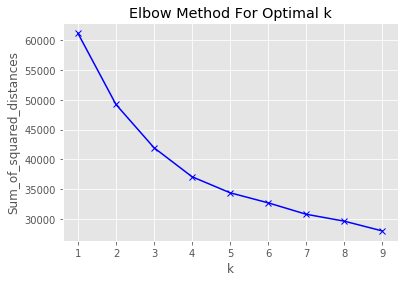

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()